In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/endotakeru/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train = pd.read_csv('../inputs/train.csv')
test = pd.read_csv('../inputs/test.csv')

In [54]:
data = pd.concat([train, test])

Platform , Genre, Year

In [55]:
from sklearn.decomposition import PCA, TruncatedSVD

In [73]:
plat_pivot = data.pivot_table(index='Publisher', columns=['Platform', 'Genre'] ,values='Name', aggfunc='count').reset_index()

In [74]:
plat_pivot

Platform                     Publisher   2600                          \
Genre                                  Action Adventure Fighting Misc   
0                      10TACLE Studios    NaN       NaN      NaN  NaN   
1                           1C Company    NaN       NaN      NaN  NaN   
2         20th Century Fox Video Games    4.0       NaN      NaN  NaN   
3                               2D Boy    NaN       NaN      NaN  NaN   
4                                  3DO    NaN       NaN      NaN  NaN   
..                                 ...    ...       ...      ...  ...   
576                        id Software    NaN       NaN      NaN  NaN   
577                    imageepoch Inc.    NaN       NaN      NaN  NaN   
578               inXile Entertainment    NaN       NaN      NaN  NaN   
579                          mixi, Inc    NaN       NaN      NaN  NaN   
580                       responDESIGN    NaN       NaN      NaN  NaN   

Platform                                            ...      XOne           \
Genre    Platform Puzzle Racing Shooter Simulation  ... Adventure Fighting   
0             NaN    NaN    NaN     NaN        NaN  ...       NaN      NaN   
1             NaN    NaN    NaN     NaN        NaN  ...       NaN      NaN   
2             NaN    NaN    NaN     1.0        NaN  ...       NaN      NaN   
3             NaN    NaN    NaN     NaN        NaN  ...       NaN      NaN   
4             NaN    NaN    NaN     NaN        NaN  ...       NaN      NaN   
..            ...    ...    ...     ...        ...  ...       ...      ...   
576           NaN    NaN    NaN     NaN        NaN  ...       NaN      NaN   
577           NaN    NaN    NaN     NaN        NaN  ...       NaN      NaN   
578           NaN    NaN    NaN     NaN        NaN  ...       NaN      NaN   
579           NaN    NaN    NaN     NaN        NaN  ...       NaN      NaN   
580           NaN    NaN    NaN     NaN        NaN  ...       NaN      NaN   

Platform                                                                       
Genre    Misc Platform Racing Role-Playing Shooter Simulation Sports Strategy  
0         NaN      NaN    NaN          NaN     NaN        NaN    NaN      NaN  
1         NaN      NaN    NaN          NaN     NaN        NaN    NaN      NaN  
2         NaN      NaN    NaN          NaN     NaN        NaN    NaN      NaN  
3         NaN      NaN    NaN          NaN     NaN        NaN    NaN      NaN  
4         NaN      NaN    NaN          NaN     NaN        NaN    NaN      NaN  
..        ...      ...    ...          ...     ...        ...    ...      ...  
576       NaN      NaN    NaN          NaN     NaN        NaN    NaN      NaN  
577       NaN      NaN    NaN          NaN     NaN        NaN    NaN      NaN  
578       NaN      NaN    NaN          NaN     NaN        NaN    NaN      NaN  
579       NaN      NaN    NaN          NaN     NaN        NaN    NaN      NaN  
580       NaN      NaN    NaN          NaN     NaN        NaN    NaN      NaN  

[581 rows x 294 columns]

In [64]:
def pivot_pca(df, n_components, target, columns):
    """pivot tableを使ってPCAする
    Args:
        n_components ([type]): PCA
        target ([type]): エンコーディングしたいカラム
        columns ([type]): 数えられるカテゴリ
    """
    plat_pivot = df.pivot_table(index=target, columns=columns, values='Name', aggfunc='count').reset_index()
    plat_pivot_df = plat_pivot[[target]]
    pca = PCA(n_components=n_components)
    features = plat_pivot[[i for i in plat_pivot.columns if i != target]]
    features = features.fillna(-1)
    pca.fit(features)
    # 変換の適用
    pca_df = pca.transform(features)
    # 主成分得点
    for i in range(n_components):
        plat_pivot_df[f"PCA_{target}_{columns[0]}_{i}"] = pca_df[:, i]
    df = pd.merge(df, plat_pivot_df, on=target, how='left')
    return df

In [65]:
data = pivot_pca(data, 7, 'Publisher', 'Platform')

/Users/endotakeru/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [68]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,PCA_Publisher_Platform_4,PCA_Publisher_Platform_5,PCA_Publisher_Platform_6,PCA_Publisher_P_0,PCA_Publisher_P_1,PCA_Publisher_P_2,PCA_Publisher_P_3,PCA_Publisher_P_4,PCA_Publisher_P_5,PCA_Publisher_P_6
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180.0,97.0,0.0,28.0,306.0,...,-19.077332,-1.298808,-9.375248,51.247199,-22.364048,7.133012,34.559920,-19.077334,-1.298804,-9.375185
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151.0,61.0,0.0,21.0,234.0,...,2.622624,1.672606,5.040064,22.322701,2.035823,6.645689,-0.688331,2.622624,1.672608,5.040062
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56.0,44.0,0.0,27.0,128.0,...,-19.077332,-1.298808,-9.375248,51.247199,-22.364048,7.133012,34.559920,-19.077334,-1.298804,-9.375185
3,Combat,2600,NaN,Action,Atari,117.0,7.0,0.0,1.0,125.0,...,40.326732,0.061365,-13.751542,90.564603,-5.469399,11.288278,-37.197829,40.326732,0.061365,-13.751553
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69.0,42.0,0.0,12.0,124.0,...,-19.077332,-1.298808,-9.375248,51.247199,-22.364048,7.133012,34.559920,-19.077334,-1.298804,-9.375185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,SD Gundam G Generation Genesis,PSV,2016.0,Strategy,Namco Bandai Games,NaN,NaN,NaN,NaN,NaN,...,-10.047710,26.690403,-1.659366,241.816941,3.119272,-99.615091,74.741656,-10.047710,26.690411,-1.659353
16715,SD Gundam G Generation Genesis,PS4,2016.0,Strategy,Namco Bandai Games,NaN,NaN,NaN,NaN,NaN,...,-10.047710,26.690403,-1.659366,241.816941,3.119272,-99.615091,74.741656,-10.047710,26.690411,-1.659353
16716,Battle Worlds: Kronos,PC,2016.0,Strategy,Nordic Games,NaN,NaN,NaN,NaN,NaN,...,-4.898770,-3.505152,-2.185758,0.757096,-5.917026,3.983080,4.299050,-4.898772,-3.505146,-2.185722
16717,Codename: Panzers Complete Collection,PC,2016.0,Strategy,Nordic Games,NaN,NaN,NaN,NaN,NaN,...,-4.898770,-3.505152,-2.185758,0.757096,-5.917026,3.983080,4.299050,-4.898772,-3.505146,-2.185722


In [36]:
data = pd.merge(data, plat_pivot, on='Publisher', how='left')

In [15]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,SAT_y,SCD_y,SNES_y,TG16_y,WS_y,Wii_y,WiiU_y,X360_y,XB_y,XOne_y
0,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,180.0,97.0,0.0,28.0,306.0,...,NaN,NaN,NaN,NaN,NaN,24.0,15.0,34.0,NaN,14.0
1,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,151.0,61.0,0.0,21.0,234.0,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,8.0,8.0,NaN
2,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,56.0,44.0,0.0,27.0,128.0,...,NaN,NaN,NaN,NaN,NaN,24.0,15.0,34.0,NaN,14.0
3,Combat,2600,NaN,Action,Atari,117.0,7.0,0.0,1.0,125.0,...,NaN,NaN,NaN,NaN,NaN,24.0,NaN,20.0,37.0,2.0
4,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,69.0,42.0,0.0,12.0,124.0,...,NaN,NaN,NaN,NaN,NaN,24.0,15.0,34.0,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,SD Gundam G Generation Genesis,PSV,2016.0,Strategy,Namco Bandai Games,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,26.0,NaN,4.0,56.0,13.0,44.0,10.0,9.0
16715,SD Gundam G Generation Genesis,PS4,2016.0,Strategy,Namco Bandai Games,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,26.0,NaN,4.0,56.0,13.0,44.0,10.0,9.0
16716,Battle Worlds: Kronos,PC,2016.0,Strategy,Nordic Games,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,3.0,2.0,NaN,3.0
16717,Codename: Panzers Complete Collection,PC,2016.0,Strategy,Nordic Games,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,3.0,2.0,NaN,3.0


In [9]:
data.Name.values

array(['LEGO Batman: The Videogame',
       'LEGO Indiana Jones: The Original Adventures',
       'LEGO Batman: The Videogame', ..., 'Battle Worlds: Kronos',
       'Codename: Panzers Complete Collection', 'Imagine: Makeup Artist'],
      dtype=object)

In [13]:
a = pd.DataFrame()

In [17]:
a['x'] = [1,1,1,1]

In [19]:
a['b'] = [[1,2], [2,2], [3,4], [7,4]]

In [29]:
a

,x,b
0,1,"[1, 2]"
1,1,"[2, 2]"
2,1,"[3, 4]"
3,1,"[7, 4]"


In [28]:
[i[0] for i in a.b.values]

[1, 2, 3, 7]

In [20]:
def cha_count(df, cha):
    counter = 0
    for i in df['Name']:
        try:
            if cha in i:
                counter += 1
        except:
            pass
    print(counter)

In [21]:
cha_count(data, 'LEGO')

149


In [24]:
all_cha = ''
for i in data['Name']:
    all_cha = all_cha + ' ' + str(i)

In [25]:
len(all_cha)

417327

In [26]:
words = all_cha.split(' ')

In [27]:
import collections

In [30]:
words_dict = collections.Counter(words)

In [33]:
score_sorted = sorted(words_dict.items(), key=lambda x:x[1], reverse=True)

## 固有名詞を摘出
Pro
Game
Super
Soccer
Dragon
NBA
Battle
NFL
LEGO
Collection
FIFA
Racing
Wars
Dance
Adventure
Heroes
Baseball
Ninja
Monster
Fantasy
Disney's
Disney
Sonic
Samurai

In [38]:
pub_dict = {}
for i in data.Publisher.unique():
    pub_dict[i] = len(data[data['Publisher'] == i])

In [41]:
pub_sorted = sorted(pub_dict.items(), key=lambda x:x[1], reverse=True)

In [50]:
pub_sorted

[('Electronic Arts', 1356),
 ('Activision', 985),
 ('Namco Bandai Games', 939),
 ('Ubisoft', 933),
 ('Konami Digital Entertainment', 834),
 ('THQ', 715),
 ('Nintendo', 706),
 ('Sony Computer Entertainment', 687),
 ('Sega', 638),
 ('Take-Two Interactive', 422),
 ('Capcom', 386),
 ('Atari', 367),
 ('Tecmo Koei', 348),
 ('Warner Bros. Interactive Entertainment', 235),
 ('Square Enix', 234),
 ('Disney Interactive Studios', 218),
 ('Unknown', 201),
 ('Eidos Interactive', 198),
 ('Midway Games', 198),
 ('Microsoft Game Studios', 191),
 ('505 Games', 191),
 ('Acclaim Entertainment', 186),
 ('D3Publisher', 184),
 ('Vivendi Games', 164),
 ('Codemasters', 150),
 ('Idea Factory', 133),
 ('Deep Silver', 121),
 ('Nippon Ichi Software', 106),
 ('Zoo Digital Publishing', 104),
 ('Majesco Entertainment', 92),
 ('LucasArts', 90),
 ('Rising Star Games', 87),
 ('Hudson Soft', 81),
 ('Bethesda Softworks', 76),
 ('Banpresto', 73),
 ('Crave Entertainment', 71),
 ('Atlus', 67),
 ('Infogrames', 62),
 ('Virgin

In [67]:
pub_dict_train = {}
for i in train.Publisher.unique():
    pub_dict_train[i] = len(train[train['Publisher'] == i])
pub_dict_train = sorted(pub_dict_train.items(), key=lambda x:x[1], reverse=True)    

In [68]:
pub_dict_train

[('THQ', 715),
 ('Nintendo', 706),
 ('Sony Computer Entertainment', 687),
 ('Sega', 638),
 ('Take-Two Interactive', 422),
 ('Capcom', 386),
 ('Atari', 367),
 ('Tecmo Koei', 348),
 ('Warner Bros. Interactive Entertainment', 235),
 ('Square Enix', 234),
 ('Disney Interactive Studios', 218),
 ('Microsoft Game Studios', 191),
 ('505 Games', 191),
 ('D3Publisher', 184),
 ('Vivendi Games', 164),
 ('Idea Factory', 133),
 ('Nippon Ichi Software', 106),
 ('Majesco Entertainment', 92),
 ('LucasArts', 90),
 ('Bethesda Softworks', 76),
 ('Banpresto', 73),
 ('Crave Entertainment', 71),
 ('Atlus', 67),
 ('Ignition Entertainment', 61),
 ('Focus Home Interactive', 61),
 ('Marvelous Interactive', 56),
 ('SquareSoft', 52),
 ('Kadokawa Shoten', 50),
 ('Destineer', 45),
 ('Alchemist', 43),
 ('MTV Games', 41),
 ('Global Star', 39),
 ('Takara Tomy', 38),
 ('TDK Mediactive', 36),
 ('BAM! Entertainment', 35),
 ('Zoo Games', 33),
 ('Mindscape', 31),
 ('Enix Corporation', 30),
 ('Kalypso Media', 29),
 ('Activis

## publisherを各国での総売上額に変換
## Genre...

In [65]:
test[test['Publisher'] == 'Activision']

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
7,Shrek the Third,DS,NaN,Action,Activision,70.0,16.0,6.5,4.0,Vicarious Visions,E
10,Ghostbusters II,2600,NaN,Action,Activision,NaN,NaN,NaN,NaN,NaN,NaN
90,Dragster,2600,NaN,Racing,Activision,NaN,NaN,NaN,NaN,NaN,NaN
115,Call of Duty 3,Wii,NaN,Shooter,Activision,69.0,42.0,6.7,61.0,Exakt,T
116,Call of Duty: Black Ops,PC,NaN,Shooter,Activision,81.0,29.0,5.2,1651.0,Treyarch,M
...,...,...,...,...,...,...,...,...,...,...,...
8312,Destiny: The Collection,PS4,2016.0,Shooter,Activision,NaN,NaN,8.1,9.0,Bungie,T
8314,Call of Duty: Infinite Warfare,PC,2016.0,Shooter,Activision,73.0,16.0,3,440.0,Infinity Ward,M
8315,Destiny: The Collection,XOne,2016.0,Shooter,Activision,NaN,NaN,tbd,NaN,Bungie,T
8319,Call of Duty: Modern Warfare Trilogy,X360,2016.0,Shooter,Activision,NaN,NaN,tbd,NaN,Infinity Ward,M


In [61]:
train['Publisher'].unique()

array(['Warner Bros. Interactive Entertainment', 'LucasArts', 'Atari',
       'Sega', 'Disney Interactive Studios', 'Vivendi Games',
       'Square Enix', 'Nintendo', 'Ignition Entertainment', 'THQ',
       'Focus Home Interactive', 'Capcom', 'MTV Games', 'Funsta',
       'Majesco Entertainment', 'System 3 Arcade Software',
       'Nippon Ichi Software', 'Idea Factory', 'Bethesda Softworks',
       'Take-Two Interactive', 'D3Publisher', 'Kalypso Media',
       'Sony Computer Entertainment', 'Oxygen Interactive', 'Ghostlight',
       'Slitherine Software', 'Parker Bros.', 'Mystique', 'Men-A-Vision',
       'Tigervision', 'Mattel Interactive', 'Coleco', 'Imagic', 'Taito',
       'ITT Family Games', 'Bomb', 'Quelle', 'Mycom', 'Enix Corporation',
       'SquareSoft', 'Maxis', 'Palcom', 'HAL Laboratory', 'Tecmo Koei',
       'Epoch', 'Square', 'Kemco', 'Imagineer', 'Banpresto', 'ChunSoft',
       'Takara', 'Video System', 'id Software', 'SNK',
       'Sammy Corporation', 'Imax', 'Laguna', '

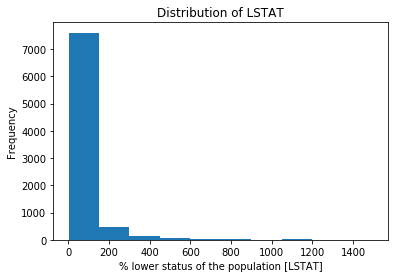

In [25]:
plt.hist(x=train[train['Global_Sales'] < 1500].Global_Sales)                         # ヒストグラムをプロット

plt.title('Distribution of LSTAT')                     # 図のタイトル
plt.xlabel('% lower status of the population [LSTAT]') # x軸のラベル
plt.ylabel('Frequency')                                # y軸のラベル

plt.show()     

In [26]:
test.isnull().sum()

Name                  2
Platform              0
Year_of_Release     185
Genre                 2
Publisher            54
Critic_Score       4199
Critic_Count       4199
User_Score         3176
User_Count         4469
Developer          3134
Rating             3208
dtype: int64

In [27]:
train.isnull().sum()

Name                  0
Platform              0
Year_of_Release      84
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       4383
Critic_Count       4383
User_Score         3528
User_Count         4660
Developer          3489
Rating             3561
dtype: int64

In [28]:
print(len(train), len(test))

8359 8360


In [38]:
len(data.Name.unique())

11563

In [43]:
data.Name.split(':')

AttributeError: 'Series' object has no attribute 'split'

In [58]:
def split(x):
    try:
        a = x.split(':')
        return a[0]
    except:
        return None

print(len(data['Name'].apply(split).unique()))

9338


In [59]:
def split(x):
    try:
        a = x.split(' ')
        return a[0]
    except:
        return None

print(len(data['Name'].apply(split).unique()))

3897


In [53]:
data['Name'][:30]

0                            LEGO Batman: The Videogame
1           LEGO Indiana Jones: The Original Adventures
2                            LEGO Batman: The Videogame
3                                                Combat
4                          LEGO Harry Potter: Years 5-7
5                          LEGO Harry Potter: Years 5-7
6                                              Yakuza 4
7                          LEGO Harry Potter: Years 5-7
8               The Lord of the Rings: War in the North
9               The Lord of the Rings: War in the North
10    The Chronicles of Narnia: The Lion, The Witch ...
11                         LEGO Harry Potter: Years 5-7
12                                   The Golden Compass
13                                         Circus Atari
14                Maze Craze: A Game of Cops 'n Robbers
15                Robert Ludlum's The Bourne Conspiracy
16                         LEGO Harry Potter: Years 5-7
17                Robert Ludlum's The Bourne Con